In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as photo #读取图片

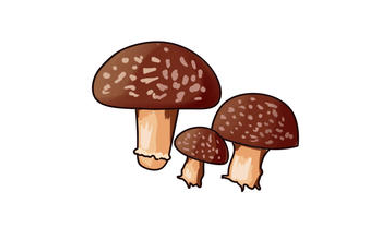

In [3]:
donggu = photo.imread('donggu.jpg')  #需要图片存放位置与运行文件处在同一个路径下
donggu.shape  #查看图片的形状
plt.imshow(donggu) # 显示图片  注意此处不需要加扩展名
plt.axis('off') # 不显示坐标轴
plt.show()

https://www.cnblogs.com/lantingg/p/9259840.html  图片显示方式

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#定义softmax函数
def softmax(a):
    exp_a=np.exp(a) #softmax函数的分子
    sum_exp_a=exp_a.sum()  #softmax函数的分母
    y=exp_a / sum_exp_a
    return y  

In [6]:
# 测试函数
a=np.array([10,23,33])
softmax(a)

array([1.02614138e-10, 4.53978687e-05, 9.99954602e-01])

In [7]:
# 定义修正函数
def softmax_(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=exp_a.sum()
    y = exp_a / sum_exp_a
    return y

In [8]:
# 测试定义的函数
a = np.array([10,23,33])
softmax_(a)

array([1.02614138e-10, 4.53978687e-05, 9.99954602e-01])

# 1、感知机实现的逻辑电路

与门 AND

输入全为1，输出为1

In [9]:
def YuMen(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    temp =x1*w1 + x2*w2
    if temp <= theta:
        return 0
    else:
        return 1

In [10]:
print(YuMen(0,0))
print(YuMen(0,1))
print(YuMen(1,0))
print(YuMen(1,1))

0
0
0
1


权重、偏置的导入后的与门函数定义

w1=0.5,w2=0.5,b=-0.7

In [11]:
# 定义函数
def YuMen_w(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b =-0.7
    temp=np.sum(x*w)+b
    if temp <=0:
        return 0
    else:
        return 1

In [12]:
# 测试运行
print(YuMen_w(0,0))
print(YuMen_w(0,1))
print(YuMen_w(1,0))
print(YuMen_w(1,1))

0
0
0
1


与非门  NAND

输入全为1，输出为0

In [13]:
def YuFeiMen(x1,x2):
    w=np.array([-0.5,-0.5])
    x=np.array([x1,x2])
    b=0.7
    y=np.sum(w*x)+b
    if y<=0:
        return 0
    else:
        return 1

In [14]:
print(YuFeiMen(0,0))
print(YuFeiMen(0,1))
print(YuFeiMen(1,0))
print(YuFeiMen(1,1))

1
1
1
0


或门 OR

输入全为0，输出为0

In [15]:
def HuoMen(x1,x2, b=-0.2):
    w1,w2=np.array([0.5,0.5])
    y=w1*x1+w2*x2
    if y<=0:
        return 0
    else:
        return 1

In [16]:
print(HuoMen(0,0))
print(HuoMen(0,1))
print(HuoMen(1,0))
print(HuoMen(1,1))

0
1
1
1


异或门

输入的数值相同，输出为0

In [17]:
# 使用单层的感知机无法实现，需要多层感知机来实现
#  AND 1,1 1
# NAND 1,1 0
# OR   0,0 0
# 异或
#    0,0 0
#    1,1 0
# 异或=AND(NAND+OR)

In [18]:
# 异或门的代码实现一
def YuHuoMen(x1,x2):
    s1=YuFeiMen(x1,x2)
    s2=HuoMen(x1,x2)
    y=YuMen_w(s1,s2)
    return y

In [19]:
print(YuHuoMen(0,0))
print(YuHuoMen(0,1))
print(YuHuoMen(1,0))
print(YuHuoMen(1,1))

0
1
1
0


In [20]:
# 异或门的代码实现二
def YuHuoMen(x1,x2):
    s1=YuFeiMen(x1,x2)
    s2=HuoMen(x1,x2)
    y=YuMen(s1,s2)
    return y

In [21]:
print(YuHuoMen(0,0))
print(YuHuoMen(0,1))
print(YuHuoMen(1,0))
print(YuHuoMen(1,1))

0
1
1
0


# 2、多层感知机

输入层向下一层传递时需要激活函数，输出结果也需要激活函数

#### 隐藏层的激活函数

常用的激活函数

In [22]:
#激活函数的表达方式
# a=b+w1*x1+w2*x2  
# y=h(a)   
#       a<=0时，y=0
#         a>0时，y=1

##### 1、进阶函数

In [23]:
# 定义函数
def step_function(x):
    y=x>0  #生成布尔序列
    return y.astype(np.int)  #将布尔值转化成0、1

In [24]:
# 测试函数
x=np.array([-1,0,3])
step_function(x)

array([0, 0, 1])

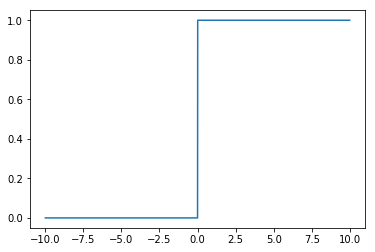

In [25]:
# 绘制阶跃函数的图像
x=np.arange(-10,10,0.01)
y=step_function(x)

plt.plot(x,y);
# ;  作用使图的文本信息不显示

##### 2、sigmoid函数

In [26]:
# 定义函数
def sigmoid(x):
    h=1/(1+np.exp(-x))
    return h

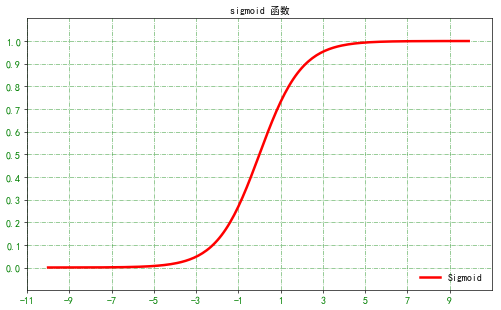

In [27]:
# 导入画图库
import matplotlib.pyplot as plt 

# 解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 绘图
x=np.arange(-10,10,0.1)
h=sigmoid(x)
plt.figure(figsize=(10,6),dpi=60) #准备画布，设置画布大小及像素
plt.plot(x,h,label='Sigmoid',color='r',
        linewidth=3) # 线的宽度
plt.xlim(-11,11)  #设置x的界限
plt.ylim(-0.1,1.1) #设置y的界限
plt.xticks(np.arange(-11,11,2),color='green',fontsize=12) #设置x的刻度线
plt.yticks(np.arange(0,1.1,0.1),color='green',fontsize=12)  #设置y的刻度线
plt.title('sigmoid 函数') #设置图像标题
plt.grid(linestyle='-.',color='green',alpha=0.6)
plt.legend(loc=4,frameon=False,fontsize=12)  #关掉图例的颜色填充
# loc=2 左上角   loc=4 右下角
plt.show()

阶跃函数与sigmoid函数的对比

In [28]:
# 相同处：结果都在区间[0,1]
# 不同处：阶跃函数  积累到一定程度才发生本质性变化
#        Sigmoid函数  实时变动
# 在现实生活中，Sigmoid函数更有实际运用意义，变化是平滑渐进的。

##### 3、Relu函数

In [29]:
# 定义函数
def relu(x):
    y=np.maximun(0,x)
    return y

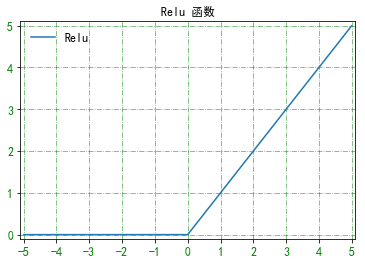

In [30]:
x=np.arange(-5,5,0.01)
y=np.maximum(0,x)
plt.plot(x,y,label='Relu')
plt.xlim(-5.1,5.1)  #设置x的界限
plt.ylim(-0.1,5.1) #设置y的界限
plt.xticks(np.arange(-5,6,1),color='green',fontsize=12) #设置x的刻度线
plt.yticks(np.arange(0,6,1),color='green',fontsize=12)  #设置y的刻度线
plt.title('Relu 函数') #设置图像标题
plt.grid(linestyle='-.',color='green',alpha=0.6)
plt.legend(loc=2,frameon=False,fontsize=12)  #关掉图例的颜色填充
# loc=2 左上角   loc=4 右下角
plt.show();

##### 4、Tanh 函数

In [31]:
# 定义函数
def tanh(t):
    t1=np.exp(t)-np.exp(-t)
    t2=np.exp(t)+np.exp(-t)
    T=t1/t2
    return T

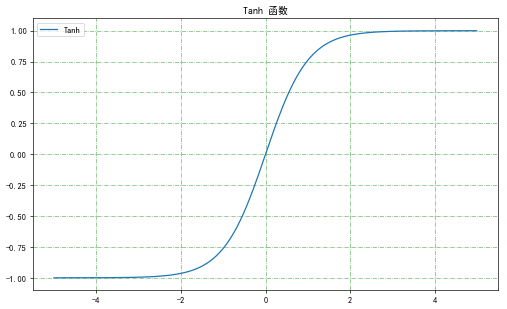

In [32]:
# 绘图
plt.figure(figsize=(10,6),dpi=60)
t=np.arange(-5,5,0.01)
T=tanh(t)
plt.plot(t,T,label='Tanh')
plt.title('Tanh 函数')
plt.grid(linestyle='-.',color='green',alpha=0.6)
plt.legend()
plt.show()


# 3、多层神经网络的实现

多层神经网络是由多层感知机的组合而来

#### 3.1 2层神经网络的实现  

In [33]:
# 未设置偏置和激活函数
X=np.array([2,4])
W=np.array([[1,3,5],[2,4,5]])
Y=np.dot(X,W)
Y

array([10, 22, 30])

加入偏置和权重

In [34]:
# 运用矩阵的形式，一次输入多个初始的神经元
# XW(1)+B(1)=A(1)  X (1,2) * W (2,3) + B (1,3) = A (1,3)
# 实现输入层两个向第二层三个神经元的传输

In [35]:
# 思路
# X=np.array([x1,x2])
# W(1)=np.array([[w11,w21,w31],
#                [w12,w22,w32]])
# B(1)=np.array([b1,b2,b3])
# A(1)=np.array([a1,a2,a3])
# X*W(1)+B(1)=A(1)

In [36]:
# 代码实现
X=np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)
A1=np.dot(X,W1)+B1
A1
# A(1)、B(1)、W(1) 作变量名会报错

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

### 3.2 3层神经网络的实现  

输入层两个神经元   第二层三个神经元  第三层两个神经元

输入层  X

In [37]:
X=np.array([1,0.5])

In [38]:
W1=np.array([[0.2,0.3,0.6],[0.4,0.5,0.2]])
B1=np.array([0.2,0.3,0.5])
A1=np.dot(X,W1)+B1  #注意  X与W1的位置不能调换

第一层输出结果 A1

In [39]:
A1

array([0.6 , 0.85, 1.2 ])

激活函数  用 Sigmoid 函数

In [40]:
# 运用之前定义过的Sigmoid函数
Z1=sigmoid(A1)
print('A1:',A1)
Z1
print('Z1:',Z1)
# 至此实现了第一层到第二层的信号传递


A1: [0.6  0.85 1.2 ]
Z1: [0.64565631 0.70056714 0.76852478]


第二层输入 W2 B2

In [41]:
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])

第二层输出值 及经过激活函数后得到的值

In [42]:
A2=np.dot(Z1,W2)+B2
print('A2:',A2)
Z2=sigmoid(A2)
print('Z2:',Z2)
# 至此实现了第二层到第三层的信号传递

A2: [0.53523649 1.26966096]
Z2: [0.63070361 0.7806847 ]


### 3层神经网络  总的代码

初始化神经网络的参数数据：

In [43]:
def init_network():
    network={"w1":np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]),
        'b1':np.array([0.1,0.2,0.3]),
        'w2':np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]),
        'b2':np.array([0.1,0.2]),
        'w3':np.array([[0.1,0.3],[0.2,0.4]]),
        'b3':np.array([0.1,0.2])}
    return network
            

信号向前传播的过程函数：

In [44]:
# 特别注意要定义恒等函数
# 恒等函数
def  identity_function(x):
    y=x
    return y

In [45]:
def forward(network,x):
    w1,w2,w3=network['w1'],network['w2'],network['w3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    a1=np.dot(x,w1)+b1  #第一层输出结果
    
    print('a1:',a1)
    z1=sigmoid(a1)  # 第一层经过激活函数的转化得到的结果
    print('z1:',z1)
    
    a2=np.dot(z1,w2)+b2  #  运用第一层经激活函数得到的结果作为输入值
#   第二层输出结果
    print('a2:',a2)
    z2=sigmoid(a2)      #第二层经过激活函数转化得到的结果
    print('z2:',z2)
    
    a3=np.dot(z2,w3)+b3  
    print('a3:',a3)
#     输出层的激活函数不再是Sigmoid函数
#   解决回归问题  恒等函数    ；解决分类问题  softmax函数
    y=identity_function(a3)  #实质  y=a3
    print('y:',y)

In [46]:
# 测试函数
x=np.array([1,0.5])
forward(init_network(),x)

a1: [0.3 0.7 1.1]
z1: [0.57444252 0.66818777 0.75026011]
a2: [0.51615984 1.21402696]
z2: [0.62624937 0.7710107 ]
a3: [0.31682708 0.69627909]
y: [0.31682708 0.69627909]


上述过程中运用到解决回归问题的输出层激活函数‘恒等函数’，接下来研究分类问题的输出层激活函数‘softmax函数’

##### softmax函数

In [47]:
# 定义softmax函数
def softmax(a):
    exp_a=np.exp(a)  # 此生的a可以是多个数值，数组形式的
    sum_exp_a=exp_a.sum()
    y=exp_a / sum_exp_a
    return y

In [48]:
# 测试函数  此处借用一下上述三层神经网络的a3结果 求经过输出层激活函数得出的结果

a=np.array([0.31682708 ,0.69627909])
print('softmax(a):',softmax(a))
y=np.array([0.31682708 ,0.69627909])
y

softmax(a): [0.40625907 0.59374093]


array([0.31682708, 0.69627909])

但是softmax函数有局限性，表达式中np.exp(n) 在n很大时，结果是无穷大，无法显示出来

In [49]:
# 接下来进行实验
np.exp(10000)
#  inf 表示无穷大 即无法用给出确切的数值

inf

面对这样的局限性要想办法修正  

In [50]:
# 修正的思路是在分子、分母上都乘一个常数C(结果不变)，经过指数函数转化成log(C)
# 此处的C可以是任何值，但为了防止溢出，一般选择传如数据的最大值
# 为避免溢出，选择除于输入数据中的最大值，转变成np.exp（a-c）能够有效的防止溢出

In [51]:
def Adj_softmax(a):  #adjust 调整
#     c=max(a)  #max与np.max 的作用相同
    c=np.max(a)  #选取输入数据中的最大值作为c
    adj_exp_a=np.exp(a-c)
    adj_sum_exp_a=adj_exp_a.sum()
#   adj_sum_exp_a=max(adj_exp) #效果等同于上一个
    y=adj_exp_a / adj_sum_exp_a
    return y

In [52]:
# 测试函数
a=np.array([0.31682708 ,0.69627909])
print('Adj_softmax(a):',softmax(a))
print('softmax(a):',softmax(a))
y=np.array([0.31682708 ,0.69627909])
y
#  未修正与修正后的数值一样是源于输入的数值太小，此时的c未发挥效果

Adj_softmax(a): [0.40625907 0.59374093]
softmax(a): [0.40625907 0.59374093]


array([0.31682708, 0.69627909])

##### 绘制softmax函数的图像

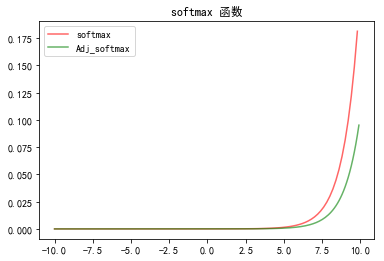

In [53]:
a1=np.arange(-10,10,0.2)
y1=softmax(a1)
a2=np.arange(-10,10,0.1)
y2=Adj_softmax(a2)

# 画图
plt.plot(a1,y1,alpha=0.6,color='red',label='softmax')
plt.plot(a2,y2,alpha=0.6,color='green',label='Adj_softmax')
plt.title('softmax 函数')
plt.legend(loc=2)
plt.show()

# 运用乳腺癌数据  实操神经网络的流程

# 1、导入库及算法、数据集

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from time import time

from  sklearn.datasets import load_breast_cancer #乳腺癌数据集 
from  sklearn.model_selection import train_test_split as TTS  #划分数据集
from  sklearn.model_selection import cross_val_score as cv   #交叉验证

from  sklearn.tree import DecisionTreeClassifier as DTC   #决策树
from sklearn.neural_network import MLPClassifier as DNN  # 多层感知分类器

from  sklearn.metrics import accuracy_score  #准确率

# 2、导入数据 ，得到特征、标签

In [55]:
canser=load_breast_cancer()
X=canser.data
y=canser.target

In [56]:
# 查看X的基本信息
X.shape

(569, 30)

In [57]:
# 查看y的基本信息
y.shape

(569,)

# 3、划分数据集

In [58]:
# 注意要传入数据
Xtrain,Xtest,Ytrain,Ytest=TTS(X,y,test_size=0.3,random_state=420)

In [59]:
# 查看训练集、测试集特征的形状
print(Xtrain.shape)
print(Xtest.shape)

(398, 30)
(171, 30)


In [60]:
# 查看训练集、测试集标签的形状
print(Ytrain.shape)
print(Ytest.shape)

(398,)
(171,)


# 4、建模

In [61]:
# 运用交叉验证得到模型的评估分数
# DNN?  #查看多层感知分类器的用法
time0=time()  #初始时间
dnn=DNN(hidden_layer_sizes=(100,),  #一层神经网络，100个神经元
        max_iter=200,  #最大迭代次数
        random_state=420)  #随机种子
print('五折交叉验证:',cv(dnn,X,y,cv=5).mean())  #查看5折交叉验证的均值
print('运行时间:',time()-time0)  


# 红色的警告是说迭代次数太小了

E:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


五折交叉验证: 0.9296344747979992
运行时间: 5.4925737380981445


In [62]:
# 为进一步改进模型，将最大迭代次数增大
time0=time()
dnn=DNN(hidden_layer_sizes=(100,),max_iter=500,random_state=420)
print('五折交叉验证：%.3f'%cv(dnn,X,y,cv=5).mean())
print('运行时间:%.3f'%(time()-time0))

五折交叉验证：0.930
运行时间:3.410


In [63]:
# 运用决策树建模，对比一下两者
time0=time()
dtc=DTC(random_state=420)  #为保持一致，设定相同的随机种子
clf=cv(dtc,X,y,cv=5).mean()
print('五折的交叉验证：%.3f'%clf)
print('运行时间：%.3f'%(time()-time0))

五折的交叉验证：0.917
运行时间：0.118


对比得出神经网络的运行时间较长，但模型训练的效果较于决策树的高，虽然决策树运行快

In [64]:
# 查看模型的训练的效果
dnn=DNN(hidden_layer_sizes=(100,),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
print('模型训练效果：%.3f'%dnn.score(Xtest,Ytest))

模型训练效果：0.924


In [65]:
# 查看参数n_layers_的用途
dnn.n_layers_
#  此结果神经元的层数，包含输入层、输出层 ，最终得出只有一个隐藏层

3

如果增加隐藏层上神经元的个数，会发生什么样的效果

In [70]:
dnn=DNN(hidden_layer_sizes=(200,),max_iter=500,random_state=420)
dnn=dnn.fit(Xtrain,Ytrain)
print('模型训练效果：%.3f'%dnn.score(Xtest,Ytest))

# 得出当隐藏层上的神经元个数新增时，模型训练效果降低了

模型训练效果：0.918


100 0.9239766081871345
200 0.9181286549707602
300 0.9064327485380117
400 0.8947368421052632
500 0.9181286549707602
600 0.9298245614035088
700 0.9298245614035088
800 0.8596491228070176
900 0.8713450292397661
1000 0.9298245614035088
1100 0.9122807017543859
1200 0.8538011695906432
1300 0.9064327485380117
1400 0.8771929824561403
1500 0.9122807017543859
1600 0.9064327485380117
1700 0.9181286549707602
1800 0.9298245614035088
1900 0.8713450292397661
max(s): 0.9298245614035088


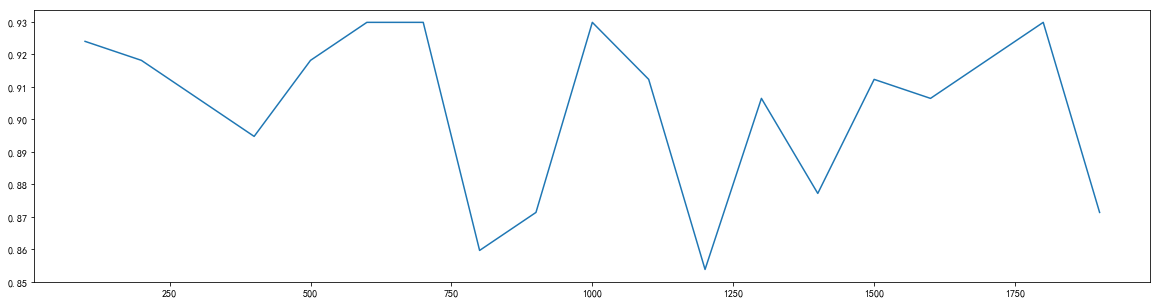

In [76]:
# 接下来绘制学习曲线观察模型效果最佳的时候，隐藏层上神经元的个数
s=[]
for i in range(100,2000,100):
    dnn=DNN(hidden_layer_sizes=(int(i)),max_iter=500,random_state=420)
    dnn=dnn.fit(Xtrain,Ytrain)
    score=dnn.score(Xtest,Ytest)
    s.append(score)
    print(i,score)
print('max(s):',max(s))
# 得到hidden_layer_sizes=1900时，模型效果最佳

# 画图
plt.figure(figsize=(20,5))
plt.plot(range(100,2000,100),s)
plt.show()

# 100时的效果约为0.92397  600、700、1000的效果都为0.92982
# 根据所得的结果及学习曲线得出，增加隐藏层上神经元个数，随提升了模型效果，但太耗时且提升的的太少

既然增加隐藏层上的神经元个数效果不佳，还可以考虑增加隐藏层的个数，看其产生怎样的效果

(100,) 0.9239766081871345
(100, 100) 0.8771929824561403
(100, 100, 100) 0.9005847953216374
(100, 100, 100, 100) 0.9122807017543859
(100, 100, 100, 100) 0.9122807017543859
(100, 100, 100, 100, 100) 0.9064327485380117
(100, 100, 100, 100, 100, 100) 0.8771929824561403
模型最佳评估效果: 0.9239766081871345


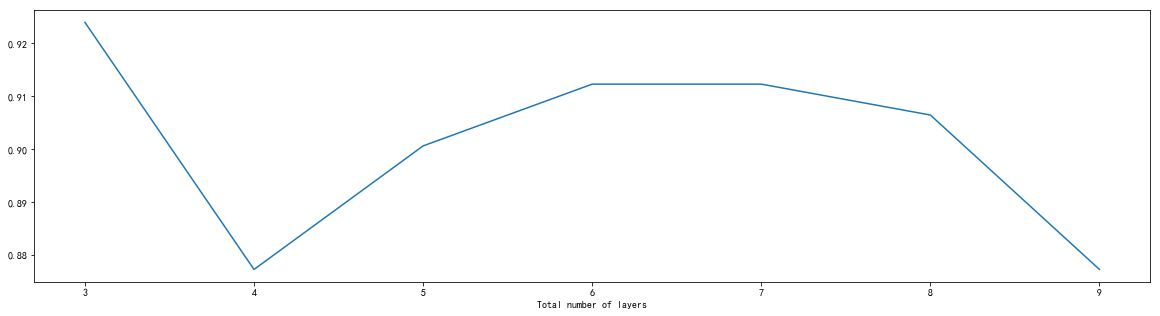

In [86]:
s=[]
layers=[(100,),(100,100),(100,100,100),
        (100,100,100,100),(100,100,100,100),
        (100,100,100,100,100),(100,100,100,100,100,100)]
for i in layers:
    dnn=DNN(hidden_layer_sizes=(i),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
    score=dnn.score(Xtest,Ytest)
    s.append(score)
    print(i,score)
print('模型最佳评估效果:',max(s))

# 画图
plt.figure(figsize=(20,5))
plt.plot(range(3,10),s)
plt.xticks([3,4,5,6,7,8,9])  #包含输入层、输出层的隐藏层个数
plt.xlabel('Total number of layers')
plt.show()


# 据结果和学习曲线得出模型最佳评估效果是一层隐藏层，
# 故而增加隐藏层的个数，未使模型评估效果提升。